In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
BTC = yf.download('BTC-GBP', start='2022-12-20', end='2022-12-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 00:00:00+00:00,13525.039062,13525.039062,13525.039062,13525.039062,13525.039062,0
2022-12-20 00:01:00+00:00,13528.828125,13528.828125,13528.828125,13528.828125,13528.828125,0
2022-12-20 00:03:00+00:00,13540.404297,13540.404297,13540.404297,13540.404297,13540.404297,0
2022-12-20 00:04:00+00:00,13542.943359,13542.943359,13542.943359,13542.943359,13542.943359,0
2022-12-20 00:05:00+00:00,13542.881836,13542.881836,13542.881836,13542.881836,13542.881836,1983488
...,...,...,...,...,...,...
2022-12-20 23:54:00+00:00,13864.080078,13864.080078,13864.080078,13864.080078,13864.080078,0
2022-12-20 23:55:00+00:00,13866.120117,13866.120117,13866.120117,13866.120117,13866.120117,0
2022-12-20 23:56:00+00:00,13866.774414,13866.774414,13866.774414,13866.774414,13866.774414,0


In [6]:
ETH = yf.download('ETH-GBP', start='2022-12-20', end='2022-12-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [7]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 00:00:00+00:00,960.600830,960.600830,960.600830,960.600830,960.600830,0
2022-12-20 00:01:00+00:00,960.971313,960.971313,960.971313,960.971313,960.971313,309248
2022-12-20 00:03:00+00:00,961.491943,961.491943,961.491943,961.491943,961.491943,0
2022-12-20 00:04:00+00:00,961.670593,961.670593,961.670593,961.670593,961.670593,0
2022-12-20 00:05:00+00:00,961.706177,961.706177,961.706177,961.706177,961.706177,311552
...,...,...,...,...,...,...
2022-12-20 23:54:00+00:00,998.807007,998.807007,998.807007,998.807007,998.807007,361472
2022-12-20 23:55:00+00:00,998.938904,998.938904,998.938904,998.938904,998.938904,651776
2022-12-20 23:56:00+00:00,998.981018,998.981018,998.981018,998.981018,998.981018,0


In [8]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [9]:
S1_0

13525.0390625

In [10]:
S2_0

960.600830078125

In [17]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1440
mu_2 = lr2.mean() * 1440
sigma_1 = lr1.std() * np.sqrt(1440)
sigma_2 = lr2.std() * np.sqrt(1440)
rho = lr1.corr(lr2)
z_0 = 0.00  
gamma = 0.5
delta = 1 #given
T = 1
M = len(BTC)

In [18]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [19]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [20]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Price')

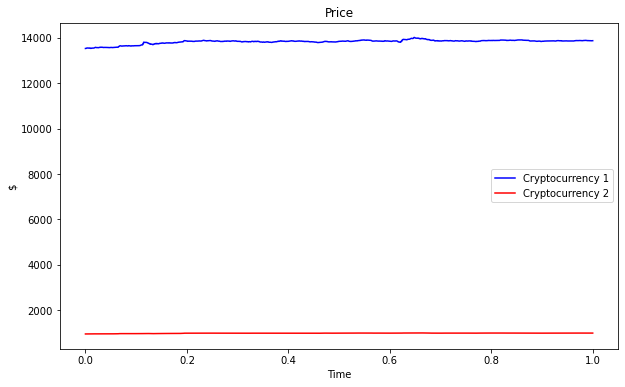

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Cryptocurrency 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Cryptocurrency 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Price')

Text(0.5, 1.0, 'z')

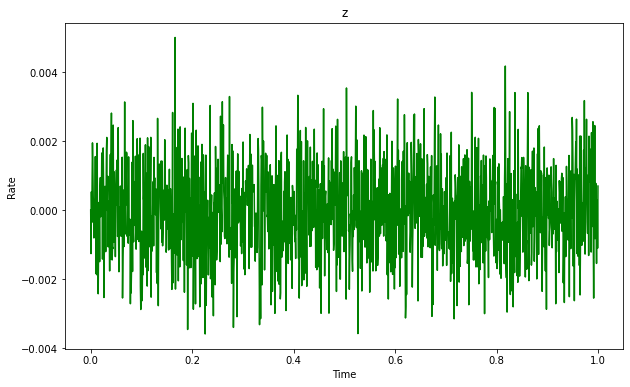

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [26]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

# Optimal Weights

Text(0.5, 1.0, 'Weights')

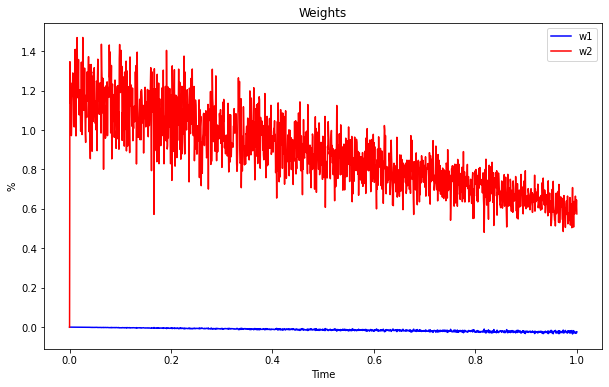

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

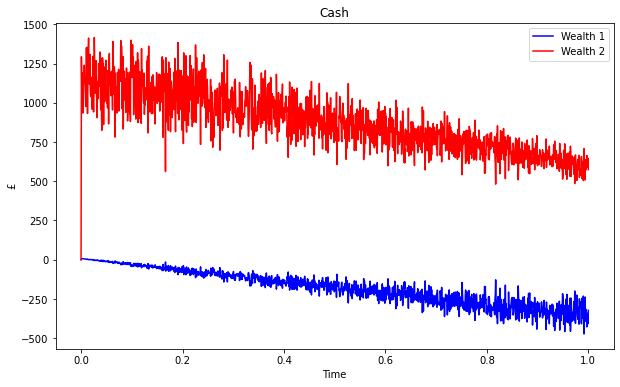

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('£')
plt.title('Cash')

In [29]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

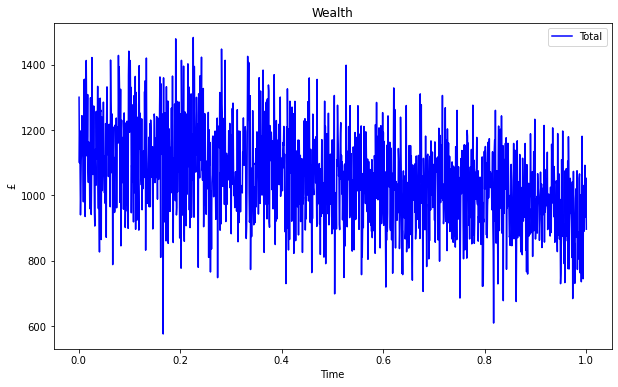

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('£')
plt.title('Wealth')

In [25]:
Wealth[1]

array([903.91869313])

In [26]:
Wealth[-1]

array([1131.46105849])

In [27]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([0.2517288])

In [31]:
Pi_1.mean()

-0.012655226217722774

In [32]:
Pi_2.mean()

0.8836676150270373

Text(0.5, 1.0, 'Comparison')

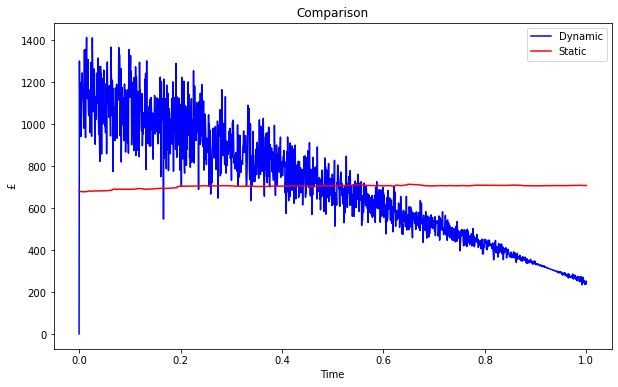

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('£')
plt.title('Comparison')

# Simulation

In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [40]:
BTC_USD = yf.download('BTC-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [41]:
BTC_USD

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00+00:00,16818.380859,16818.380859,16818.380859,16818.380859,16818.380859,0
2022-12-22 00:01:00+00:00,16825.763672,16825.763672,16825.763672,16825.763672,16825.763672,0
2022-12-22 00:02:00+00:00,16824.031250,16824.031250,16824.031250,16824.031250,16824.031250,1409024
2022-12-22 00:03:00+00:00,16829.160156,16829.160156,16829.160156,16829.160156,16829.160156,0
2022-12-22 00:04:00+00:00,16829.492188,16829.492188,16829.492188,16829.492188,16829.492188,0
...,...,...,...,...,...,...
2022-12-22 23:55:00+00:00,16828.492188,16828.492188,16828.492188,16828.492188,16828.492188,17562624
2022-12-22 23:56:00+00:00,16829.121094,16829.121094,16829.121094,16829.121094,16829.121094,0
2022-12-22 23:57:00+00:00,16828.197266,16828.197266,16828.197266,16828.197266,16828.197266,0


In [42]:
ETH_USD = yf.download('ETH-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [43]:
ETH_USD

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00+00:00,1213.672607,1213.672607,1213.672607,1213.672607,1213.672607,0
2022-12-22 00:01:00+00:00,1214.051025,1214.051025,1214.051025,1214.051025,1214.051025,0
2022-12-22 00:02:00+00:00,1213.826782,1213.826782,1213.826782,1213.826782,1213.826782,0
2022-12-22 00:03:00+00:00,1214.177002,1214.177002,1214.177002,1214.177002,1214.177002,5888
2022-12-22 00:04:00+00:00,1214.120728,1214.120728,1214.120728,1214.120728,1214.120728,0
...,...,...,...,...,...,...
2022-12-22 23:55:00+00:00,1218.341797,1218.341797,1218.341797,1218.341797,1218.341797,4136960
2022-12-22 23:56:00+00:00,1218.353638,1218.353638,1218.353638,1218.353638,1218.353638,508416
2022-12-22 23:57:00+00:00,1218.216064,1218.216064,1218.216064,1218.216064,1218.216064,1118208


In [44]:
S1_0 = BTC_USD['Open'][0]
S2_0 = ETH_USD['Open'][0]

In [45]:
S1_0

16818.380859375

In [46]:
S2_0

1213.672607421875

In [47]:
mu_1 = 0.01
mu_2 = 0.02
sigma_1 = 0.05
sigma_2 = 0.1
z_0 = 0.01
beta = 1
gamma = 1
delta = 0.7
phi = 0.01
rho = -0.6
T = 1
M = 390

In [48]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [49]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

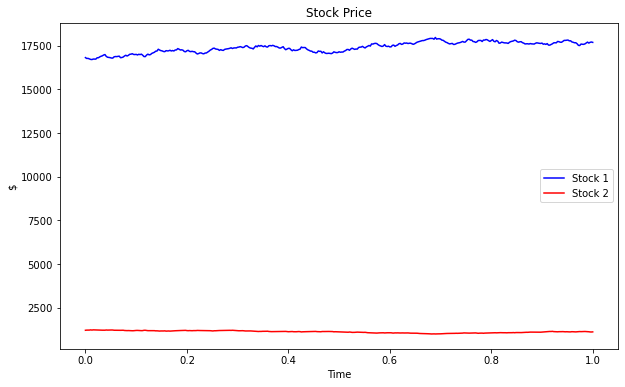

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'Alpha')

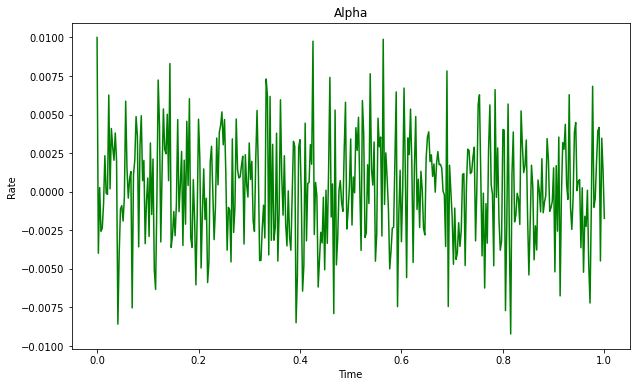

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Alpha')

In [52]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

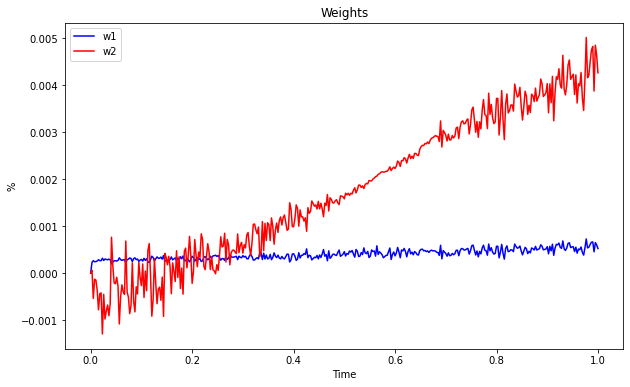

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

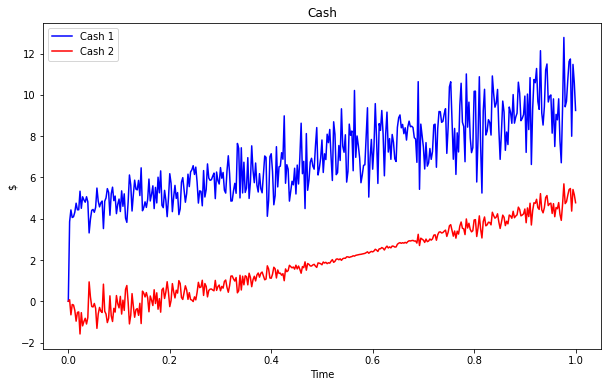

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [55]:
Pi_1.mean()

0.0003995932397532034

In [56]:
Pi_2.mean()

0.001786661514075577

Text(0.5, 1.0, 'Comparison')

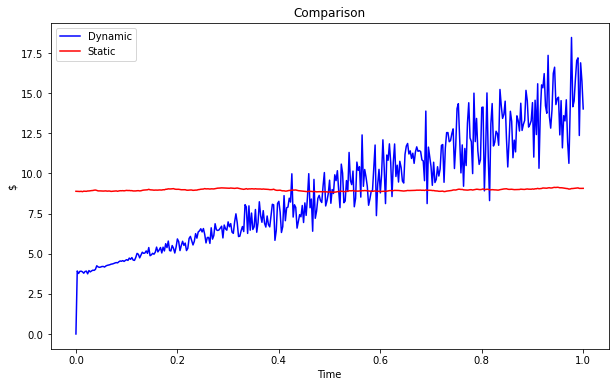

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')